# Analysis of Car Crashes in the Portland Metro Area
#### Miles DeVaney, Thomas Sato, Chris Oliva

# Goal of the project

* Our goal is to identify particularly dangerous areas of Portland with more car accidents

* We will also identify the factors which contribute the most to these accidents

* Finally, we will combine this information to make specific recommendations on how the city could improve traffic safety in one small section of the city

In [1]:
# Import some basic necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading the CSV of our data into a DataFrame
crashes = pd.read_csv('Crashes.csv')

# Data Cleaning


*   Removing duplicated, empty and irrelevent columns
*   Creating a subset of the data for Portland area only



In [3]:
# List of all the columns in crashes

crashes_columns = []
for c in crashes.columns:

  crashes_columns. append(c)

# List of all ID columns, then removing them from the DataFrame

id_columns = []
for c in crashes_columns:

  if c[-2:] == "ID":
    id_columns.append(c)

crashes = crashes.drop(id_columns, axis=1)

# List of all code columns

cd_columns = []
for c in crashes_columns:

  if c[-2:] == "CD":
    cd_columns.append(c)
    
crashes = crashes.drop(cd_columns, axis=1)

In [4]:
#Dataset for crashes happening in Portland area only

crashes_portland = crashes.dropna(subset = 'CITY_SECT_NM')
crashes_portland = crashes_portland[crashes_portland['CITY_SECT_NM'].str.contains('Portland')]
crashes_portland.head()

,X,Y,SER_NO,CRASH_DT,CRASH_HR_NO,CRASH_HR_LONG_DESC,CNTY_NM,CITY_SECT_NM,URB_AREA_LONG_NM,FC_DESC,...,TOT_MOTOR_INJ_A,TOT_PED_INJ_A_CNT,TOT_PEDCYCL_INJ_A_CNT,TOT_MTRCYCL_FATAL_CNT,TOT_MTRCYCL_INJ_A_CNT,HIGHEST_INJ_SVRTY_DESC,MJ_INVLV_FLG,GIS_JURIS,TOT_MTRCYCL_CNT,TOT_MOTOR_CNT
0,7672502.021,674041.4013,82277.0,2017/06/09 08:00:00+00,15,03:00 PM to 03:59 PM,Multnomah,Portland SE,Portland UA,URBAN PRINCIPAL ARTERIAL - INTERSTATE,...,0,0,0,0,0,No Apparent Injury/PDO Crash (O),NaN,Portland,0,2
1,7672746.505,674156.7255,6158.0,2017/06/10 08:00:00+00,7,07:00 AM to 07:59 AM,Multnomah,Portland SE,Portland UA,URBAN PRINCIPAL ARTERIAL - INTERSTATE,...,0,0,0,0,0,No Apparent Injury/PDO Crash (O),NaN,Portland,0,2
2,7674265.128,673553.6550,3874.0,2017/04/15 08:00:00+00,17,05:00 PM to 05:59 PM,Multnomah,Portland SE,Portland UA,URBAN PRINCIPAL ARTERIAL - OTHER,...,0,0,0,0,0,No Apparent Injury/PDO Crash (O),NaN,Portland,0,2
3,7672578.321,675520.6365,6732.0,2017/04/13 08:00:00+00,15,03:00 PM to 03:59 PM,Multnomah,Portland SE,Portland UA,URBAN PRINCIPAL ARTERIAL - INTERSTATE,...,0,0,0,0,0,No Apparent Injury/PDO Crash (O),NaN,Portland,0,2
4,7671769.903,674221.2235,11764.0,2017/10/19 08:00:00+00,8,08:00 AM to 08:59 AM,Multnomah,Portland SE,Portland UA,URBAN PRINCIPAL ARTERIAL - OTHER,...,0,0,0,0,0,No Apparent Injury/PDO Crash (O),NaN,Portland,0,2


In [5]:
# Removing irrelevant columns from crashes_portland:

unused_columns = ['CRASH_DT', 'X', 'Y', 'SER_NO', 'HWY_NO', 'HWY_SFX_NO', 'LRS_VAL', 'AGY_ST_NO', 'ISECT_AGY_ST_NO', 'ISECT_SEQ_NO', 'FROM_ISECT_DSTNC_QTY', 'GIS_PRC_DT', # Irrelevant Information
                      'CNTY_NM', 'CITY_SECT_NM', 'URB_AREA_LONG_NM', 'CRASH_HR_LONG_DESC', 'POP_RNG_MED_DESC', 'EFFECTV_DT', 'GIS_JURIS', # Redundant Information
                      'LAT_DEG_NO', 'LAT_MINUTE_NO', 'LAT_SEC_NO', 'LONGTD_DEG_NO', 'LONGTD_MINUTE_NO', 'LONGTD_SEC_NO', #Latitude/Longitude
                      'SEG_PT_LRS_MEAS', 'SPECL_JRSDCT_LONG_DESC', 'RECRE_RD_NM', 'ISECT_RECRE_RD_NM', # No values - All missing data
                      'UNLOCT_FLG', 'TRAF_CNTL_FUNC_FLG', 'UGB', 'MPA', # Flags that have only one value
                      'CRASH_CAUSE_2_LONG_DESC', 'CRASH_CAUSE_3_LONG_DESC', 'CRASH_EVNT_2_LONG_DESC', 'CRASH_EVNT_3_LONG_DESC' # Extraneous crash event descriptions
                      ]

crashes_portland = crashes_portland.drop(unused_columns, axis = 1)
crashes_portland.head()

,CRASH_HR_NO,FC_DESC,NHS_FLG,RTE_NM,HWY_MED_NM,RDWY_NO,HWY_COMPNT_LONG_DESC,MLGE_TYP_LONG_DESC,RD_CON_NO,MP_NO,...,TOT_MOTOR_FATAL,TOT_MOTOR_INJ_A,TOT_PED_INJ_A_CNT,TOT_PEDCYCL_INJ_A_CNT,TOT_MTRCYCL_FATAL_CNT,TOT_MTRCYCL_INJ_A_CNT,HIGHEST_INJ_SVRTY_DESC,MJ_INVLV_FLG,TOT_MTRCYCL_CNT,TOT_MOTOR_CNT
0,15,URBAN PRINCIPAL ARTERIAL - INTERSTATE,1,IS 205,EAST PORTLAND FREEWAY,2.0,Mainline State Highway,Regular Mileage,NaN,19.08,...,0,0,0,0,0,0,No Apparent Injury/PDO Crash (O),NaN,0,2
1,7,URBAN PRINCIPAL ARTERIAL - INTERSTATE,1,IS 205,EAST PORTLAND FREEWAY,1.0,Connection,Regular Mileage,2.0,19.12,...,0,0,0,0,0,0,No Apparent Injury/PDO Crash (O),NaN,0,2
2,17,URBAN PRINCIPAL ARTERIAL - OTHER,1,US 26,MT. HOOD,1.0,Mainline State Highway,Regular Mileage,NaN,6.18,...,0,0,0,0,0,0,No Apparent Injury/PDO Crash (O),NaN,0,2
3,15,URBAN PRINCIPAL ARTERIAL - INTERSTATE,1,IS 205,EAST PORTLAND FREEWAY,2.0,Mainline State Highway,Regular Mileage,NaN,19.36,...,0,0,0,0,0,0,No Apparent Injury/PDO Crash (O),NaN,0,2
4,8,URBAN PRINCIPAL ARTERIAL - OTHER,1,US 26,MT. HOOD,1.0,Mainline State Highway,Regular Mileage,NaN,5.59,...,0,0,0,0,0,0,No Apparent Injury/PDO Crash (O),NaN,0,2


In [7]:
# All rows where there are death(s) cause by the crash in Portland

fatal_crashes = crashes_portland[crashes_portland["TOT_FATAL_CNT"] != 0]
fatal_crashes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 533 entries, 375 to 338436
Data columns (total 77 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   CRASH_HR_NO                    533 non-null    int64  
 1   FC_DESC                        533 non-null    object 
 2   NHS_FLG                        533 non-null    int64  
 3   RTE_NM                         168 non-null    object 
 4   HWY_MED_NM                     184 non-null    object 
 5   RDWY_NO                        184 non-null    float64
 6   HWY_COMPNT_LONG_DESC           184 non-null    object 
 7   MLGE_TYP_LONG_DESC             184 non-null    object 
 8   RD_CON_NO                      16 non-null     float64
 9   MP_NO                          184 non-null    float64
 10  LAT_DD                         533 non-null    float64
 11  LONGTD_DD                      533 non-null    float64
 12  ST_FULL_NM                     533 non-null    obj

# EDA & Visualization

In [12]:
# EDA Graph for all data
# Using very low opacity to attempt to reveal "hotspots" with a lot of crashes
# Obviously this turned out to not be very useful

import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = px.scatter_mapbox(crashes_portland,
                        lat="LAT_DD",
                        lon="LONGTD_DD",
                        opacity=0.2,
                       zoom=10)

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

In [13]:
# EDA Graph for fatal crashes
# Using slightly higher opacity to account for the reduced size of the data

fig = px.scatter_mapbox(fatal_crashes,
                        lat="LAT_DD",
                        lon="LONGTD_DD",
                        hover_data=['TOT_FATAL_CNT'],
                        opacity=0.5,
                        zoom=10)

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

In [14]:
# EDA Graph for 2007 vs 2021
# Attempting to identify potential changes over time by comparing the two ends of our data
# Clearly this graph didn't reveal much

end_years = crashes_portland[(crashes_portland['CRASH_YR_NO'] == 2007) | (crashes_portland['CRASH_YR_NO'] == 2021)]

fig = px.scatter_mapbox(end_years,
                        lat="LAT_DD",
                        lon="LONGTD_DD",
                        color='CRASH_YR_NO',
                        opacity=0.5,
                        zoom=10)

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

In [15]:
#2007 VS 2021
# Mapping the years on separate graphs to improve visual clarity
# This also did not reveal any obvious differences

fig = go.Figure()

crashes_2007 = crashes_portland[(crashes_portland['CRASH_YR_NO'] == 2007)]
crashes_2021 = crashes_portland[(crashes_portland['CRASH_YR_NO'] == 2021)]

fig.add_trace(
    go.Scattermapbox(lat=crashes_2007["LAT_DD"],
                        lon=crashes_2007["LONGTD_DD"],
                        opacity=0.2,
                        subplot='mapbox')
)

fig.add_trace(
    go.Scattermapbox(lat=crashes_2021["LAT_DD"],
                        lon=crashes_2021["LONGTD_DD"],
                        opacity=0.2,
                        subplot='mapbox2'
                        )
)

fig.update_layout(
    autosize=True,
    hovermode='closest',
    mapbox=dict(
        style='open-street-map',
        domain={'x': [0, 0.4], 'y': [0, 1]},
        bearing=0,
        center=dict(
            lat=45.5,
            lon=-122.6
        ),
        pitch=0,
        zoom=9
    ),
        mapbox2=dict(
        style='open-street-map',
        domain={'x': [0.6, 1.0], 'y': [0, 1]},
        bearing=0,
        center=dict(
            lat=45.5,
            lon=-122.6
        ),
        pitch=0,
        zoom=9
    ),
)

fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

In [16]:
# Columns to convert to categorical
# Converting some columns to be categorical to allow for easier analysis and graphing

cat_columns = ['CRASH_HR_NO', 'RDWY_NO', 'RD_CON_NO', 'MP_NO', 'OFF_RDWY_FLG', 'RNDABT_FLG', 'ISECT_REL_FLG', 'DRVWY_REL_FLG',
               'SCHL_ZONE_IND', 'WRK_ZONE_IND', 'ALCHL_INVLV_FLG', 'DRUG_INVLV_FLG', 'CRASH_SPEED_INVLV_FLG', 'CRASH_HIT_RUN_FLG',
               'CRASH_MO_NO', 'CRASH_DAY_NO', 'CRASH_YR_NO', 'MJ_INVLV_FLG']

crashes_portland[cat_columns] = crashes_portland[cat_columns].astype('category')
crashes_portland.info()

<class 'pandas.core.frame.DataFrame'>
Index: 150926 entries, 0 to 338984
Data columns (total 77 columns):
 #   Column                         Non-Null Count   Dtype   
---  ------                         --------------   -----   
 0   CRASH_HR_NO                    150926 non-null  category
 1   FC_DESC                        150924 non-null  object  
 2   NHS_FLG                        150926 non-null  int64   
 3   RTE_NM                         52522 non-null   object  
 4   HWY_MED_NM                     57228 non-null   object  
 5   RDWY_NO                        57228 non-null   category
 6   HWY_COMPNT_LONG_DESC           57228 non-null   object  
 7   MLGE_TYP_LONG_DESC             57228 non-null   object  
 8   RD_CON_NO                      7388 non-null    category
 9   MP_NO                          57257 non-null   category
 10  LAT_DD                         150926 non-null  float64 
 11  LONGTD_DD                      150926 non-null  float64 
 12  ST_FULL_NM           

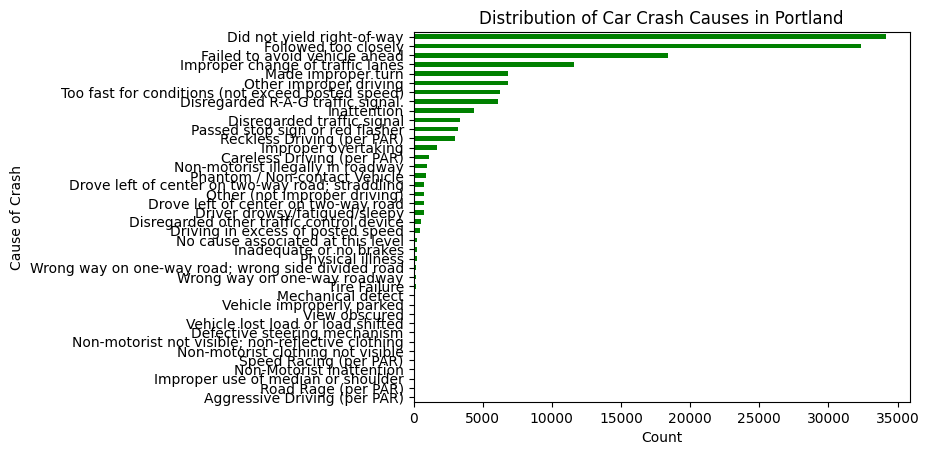

In [17]:
# EDA graph comparing the stated causes for the crashes
# This revealed some potentially significant information, with the top 2 being far and away the most common

causes = crashes_portland['CRASH_CAUSE_1_LONG_DESC'].value_counts()[::-1]

causes_plot = causes.plot(kind = "barh", color = "green")
plt.xlabel("Count")
plt.ylabel("Cause of Crash")
plt.title("Distribution of Car Crash Causes in Portland")
plt.show()

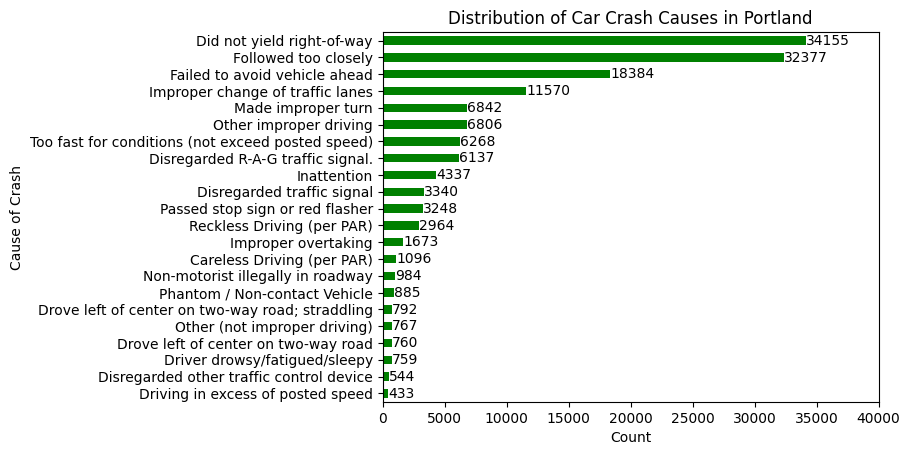

In [18]:
# The same graph with the very low values removed, to improve visual clarity

causes_filtered = causes[causes > 300]

causes_plot = causes_filtered.plot(kind = "barh", color = "green")
causes_plot.set_xlim(0, 40000)

# Adding data labels
for index in range(len(causes_filtered)):

    plt.text(x = causes_filtered[index], y = index, s = causes_filtered[index], va = "center")

plt.xlabel("Count")
plt.ylabel("Cause of Crash")
plt.title("Distribution of Car Crash Causes in Portland")
plt.show()

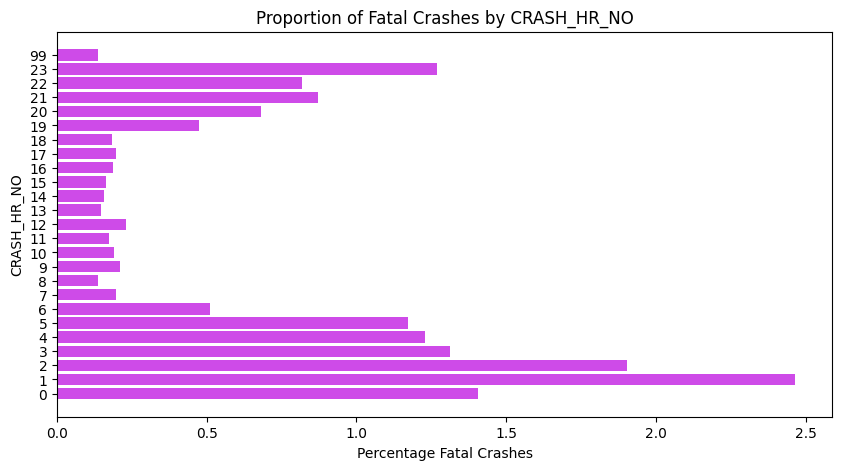

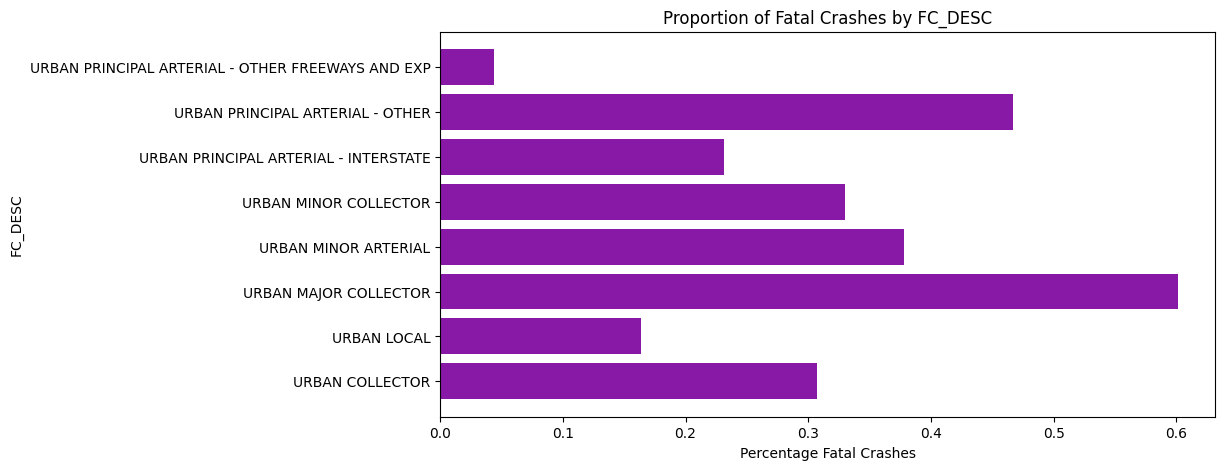

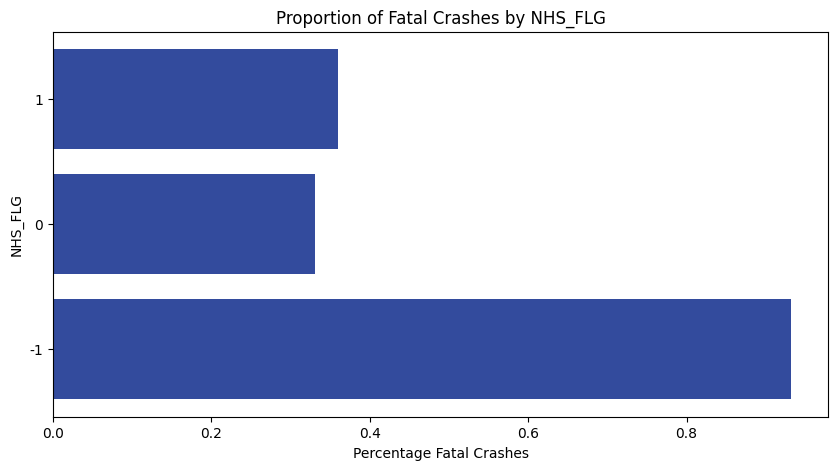

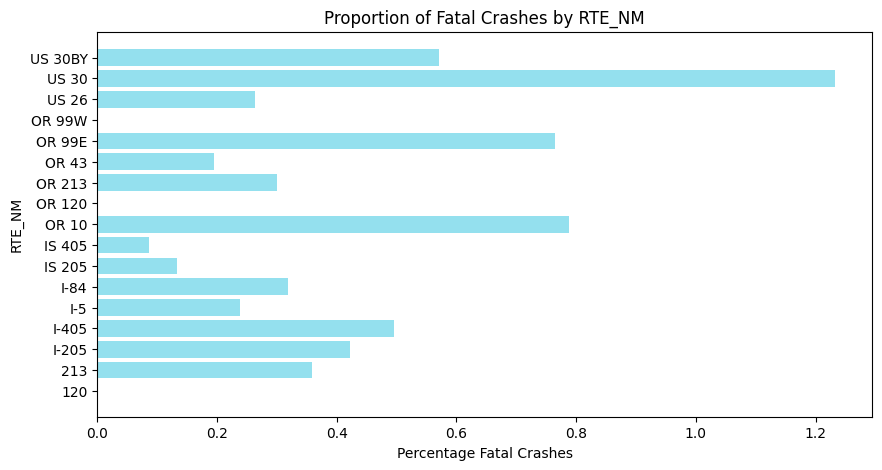

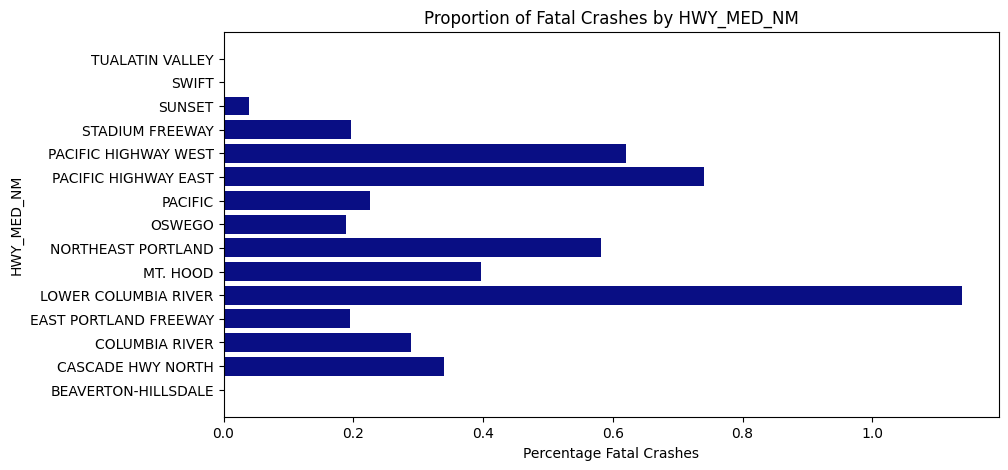

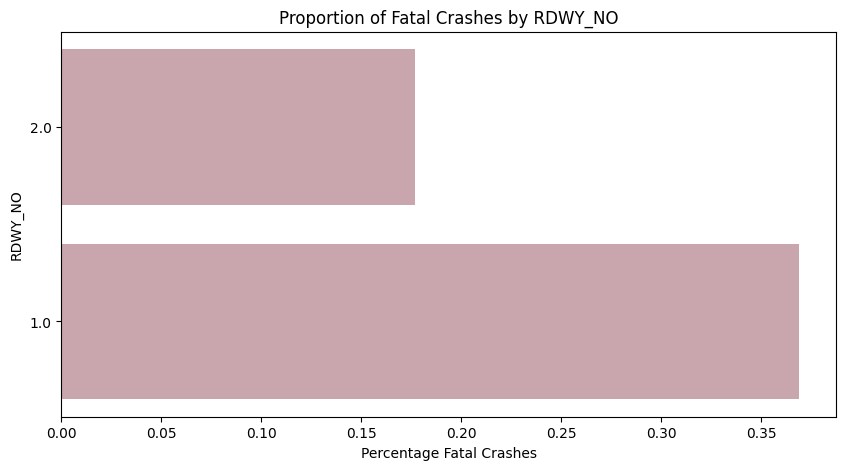

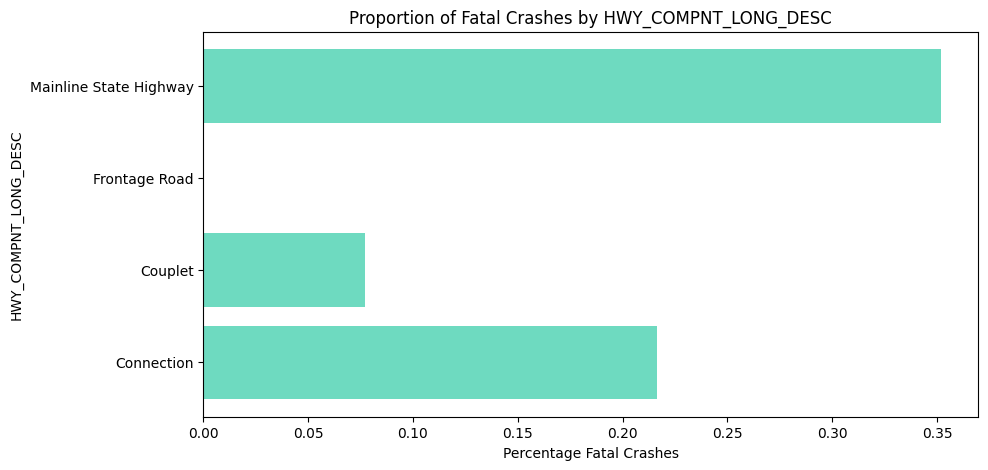

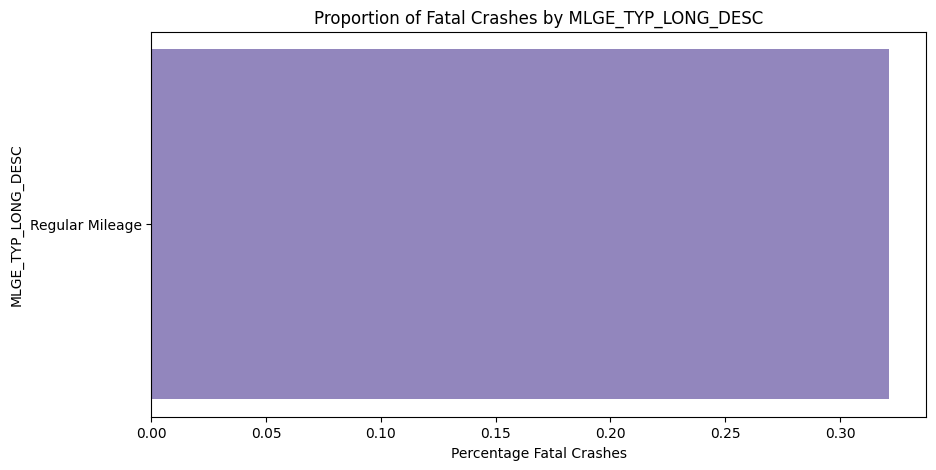

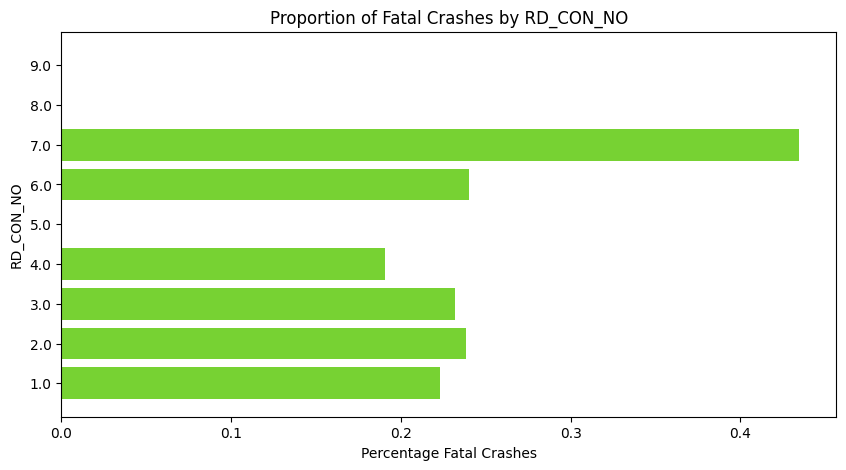

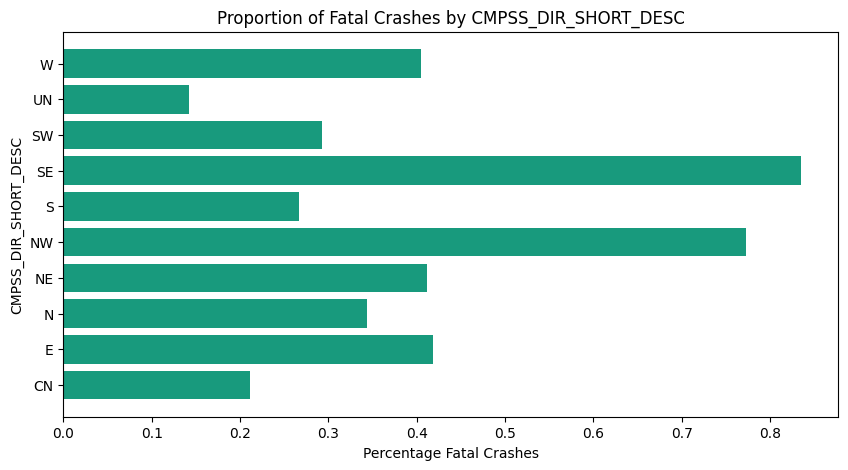

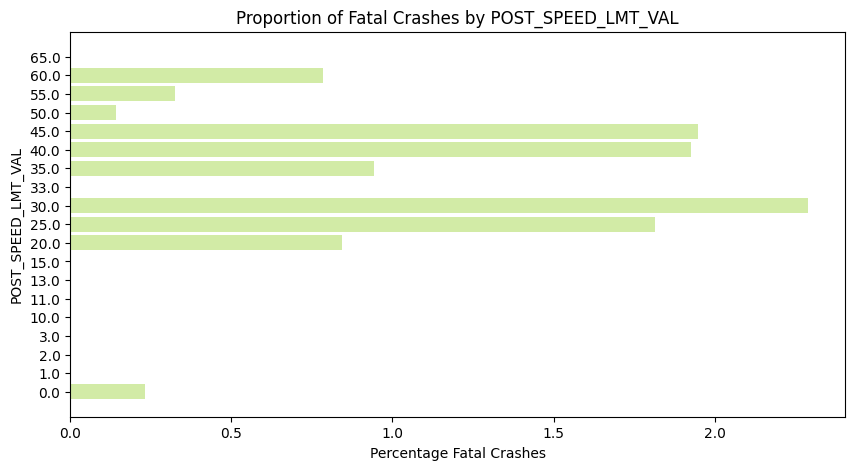

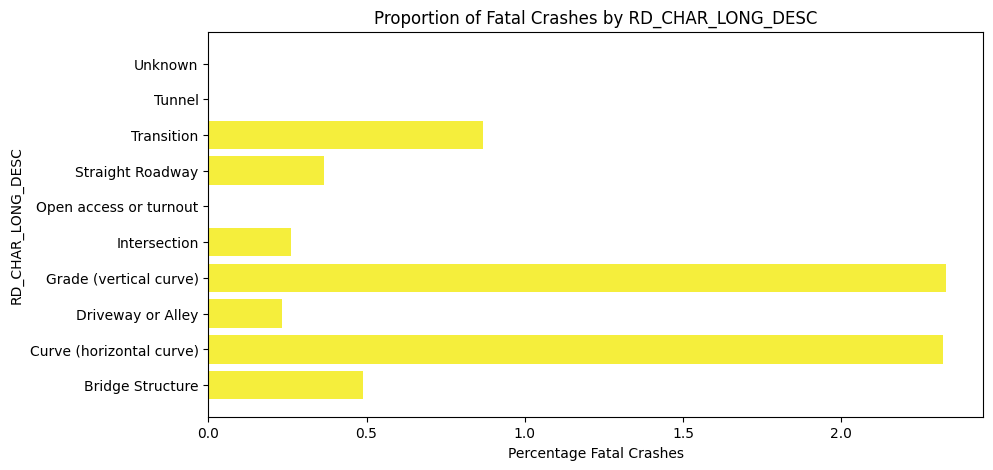

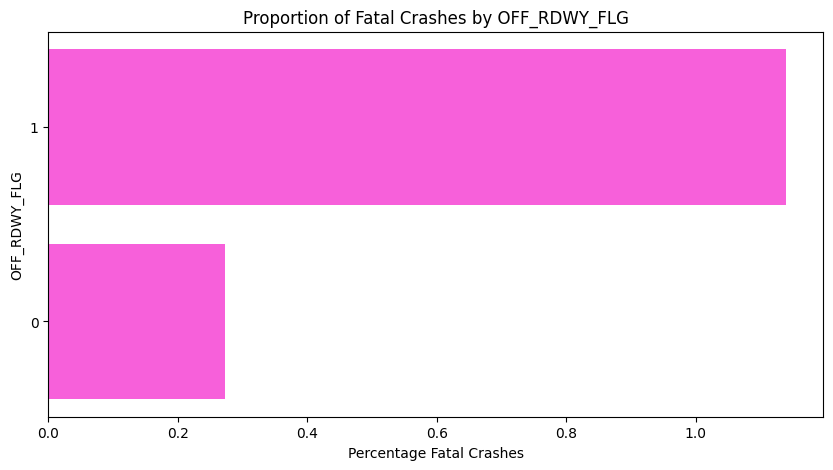

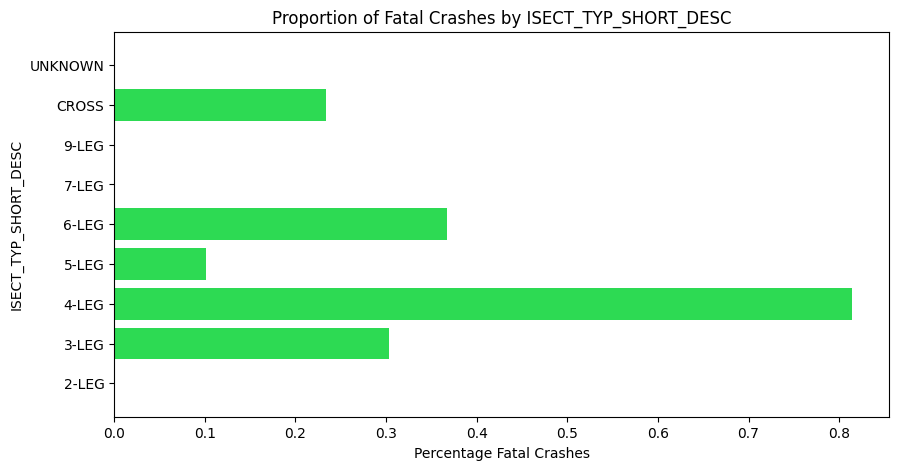

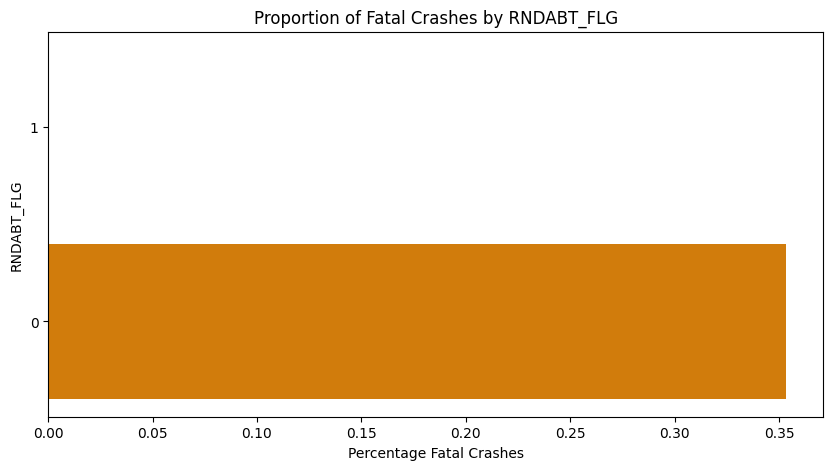

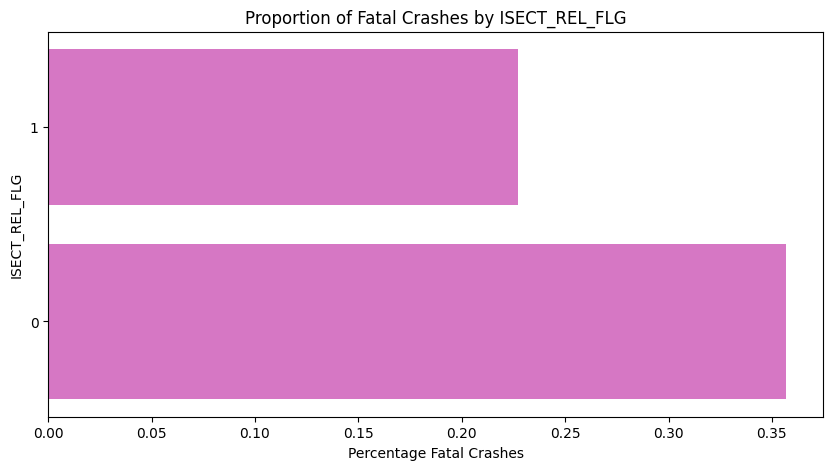

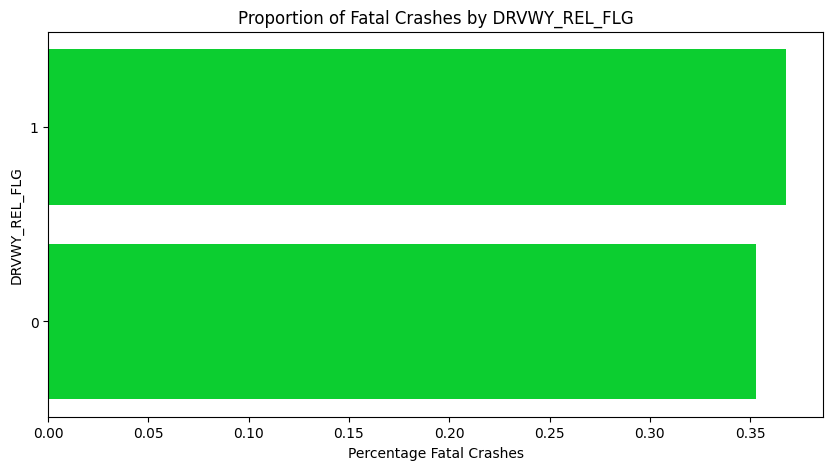

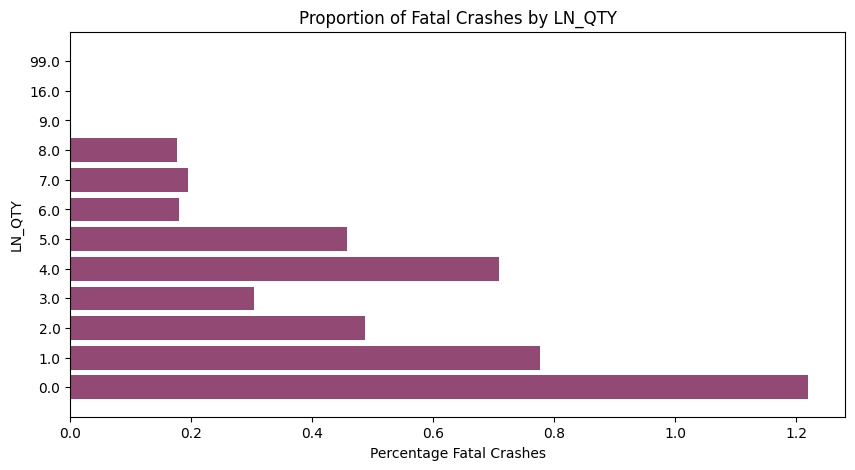

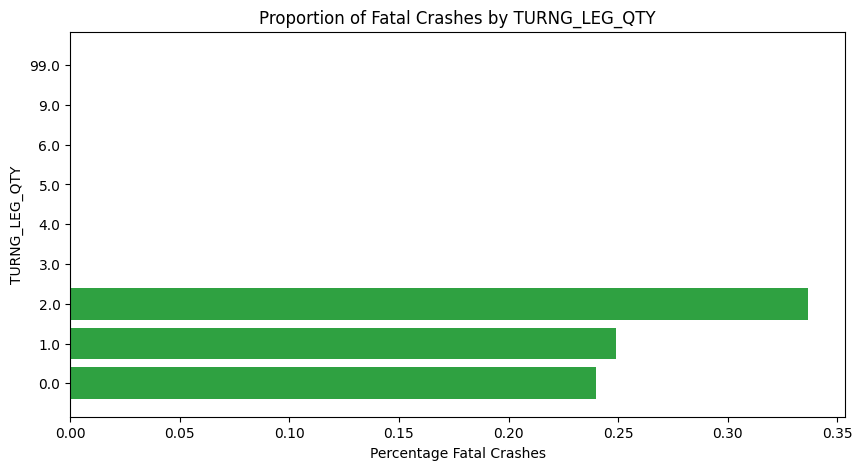

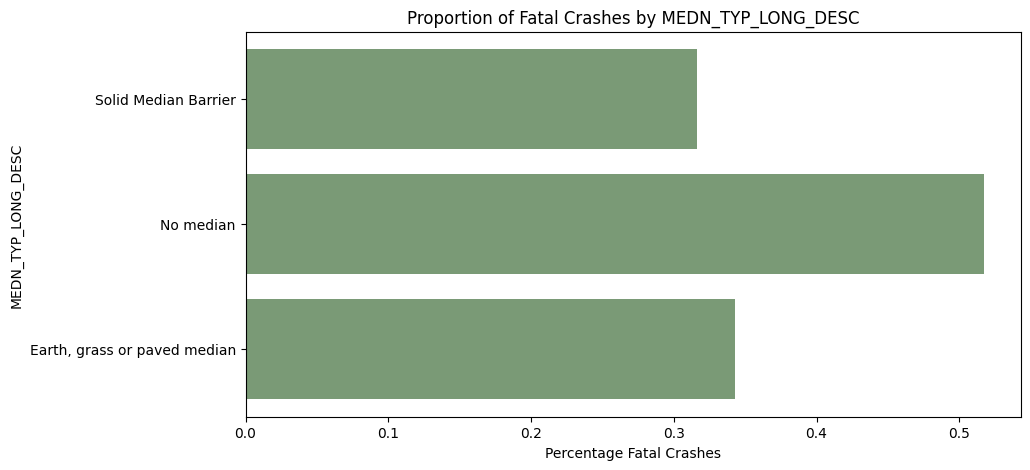

Error in callback <function flush_figures at 0x000002339AC727A0> (for post_execute):


KeyboardInterrupt: 

In [19]:
#Proportion of Fatal Crashes By Category
# Generating plots of the proportion of fatal crashes by feature in the data.
import random as rn

# Initializing color variables
count = 0
random_hex_colors = ['#' + ''.join(rn.choices('0123456789ABCDEF', k=6)) for _ in range(80)]

for column in crashes_portland.drop(columns = ['LAT_DD', 'LONGTD_DD', 'MP_NO', 'ST_FULL_NM', 'ISECT_ST_FULL_NM']).columns: # Dropping columns that have too many unique categories/numeric variables

    ct = 100 * pd.crosstab(crashes_portland['CRASH_SVRTY_LONG_DESC'], crashes_portland[column], normalize = 'columns')
    ct_fatal = ct[:1].T # Grabbing the first row (fatal crashes) and transposing for visualization

    plt.figure(figsize = (10, 5))
    plt.barh([str(name) for name in ct_fatal.index], ct_fatal['Fatal'], color = random_hex_colors[count])

    plt.xlabel("Percentage Fatal Crashes")
    plt.ylabel(column)
    plt.title(f"Proportion of Fatal Crashes by {column}")

    # Saving/Showing the plot
    #plt.tight_layout()
    #plt.savefig(f"Fatal Crash Proportions//{column}.jpg")
    #plt.show()

    count += 1

In [20]:
#Creating datasets for year 2016 to 2020 only

crashes2016 = crashes_portland[crashes_portland["CRASH_YR_NO"] == 2016]
crashes2017 = crashes_portland[crashes_portland["CRASH_YR_NO"] == 2017]
crashes2018 = crashes_portland[crashes_portland["CRASH_YR_NO"] == 2018]
crashes2019 = crashes_portland[crashes_portland["CRASH_YR_NO"] == 2019]
crashes2020 = crashes_portland[crashes_portland["CRASH_YR_NO"] == 2020]

<Axes: xlabel='months', ylabel='counts'>

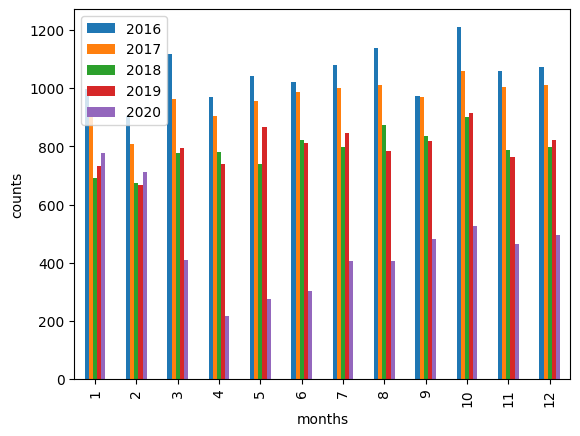

In [21]:
#Creating datasets for value counts for 2016 to 2020 for comparing number of crashes that happened each year

mo_ct_2016 = crashes2016['CRASH_MO_NO'].value_counts()
mo_ct_2017 = crashes2017["CRASH_MO_NO"].value_counts()
mo_ct_2018 = crashes2018["CRASH_MO_NO"].value_counts()
mo_ct_2019 = crashes2019["CRASH_MO_NO"].value_counts()
mo_ct_2020 = crashes2020["CRASH_MO_NO"].value_counts()

#Concatinating the value count datasets
mo_ct_2016to2020 = pd.concat([mo_ct_2016, mo_ct_2017, mo_ct_2018, mo_ct_2019, mo_ct_2020], axis = 1)
mo_ct_2016to2020.columns = ["2016", "2017", "2018", "2019", "2020"]
index_list = [i for i in range(1, 13)]
mo_ct_2016to2020 = mo_ct_2016to2020.reindex(labels = index_list)

#shows the number of crashes each month for year 2016 to 2019 compared
mo_ct_2016to2020.plot(xlabel = "months", ylabel = "counts", kind = "bar")

# Classification Tree

In [23]:
from sklearn import tree
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

#classification tree to find whether alcohol is involved or not
#year, month, weather condition, light condition, speed posted, distnace from nearest interection, crash hour, character of road, road surface condiitons,
#cols omitted cuz it's too big : 'CRASH_YR_NO', 'CRASH_MO_NO', 'CRASH_HR_NO'

col_names = ['WTHR_COND_LONG_DESC', 'LGT_COND_LONG_DESC', 'RD_SURF_MED_DESC', 'ALCHL_INVLV_FLG']
crash_classification = pd.DataFrame(crashes2020,
                         columns = col_names)
feature_cols = ['WTHR_COND_LONG_DESC', 'LGT_COND_LONG_DESC', 'RD_SURF_MED_DESC']
one_hot_data = pd.get_dummies(crash_classification[feature_cols],drop_first=True)
one_hot_data = one_hot_data.fillna(0)
X = one_hot_data
y = crash_classification['ALCHL_INVLV_FLG']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()
# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)
#Predict the response for test dataset
y_pred = clf.predict(X_test)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.95551492992078


In [25]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,feature_names = one_hot_data.columns,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('alc2.png')
Image(graph.create_png())

InvocationException: GraphViz's executables not found

# Feature Selection ML Model


In [26]:
# Feature Selection for Fatal Crashes

from sklearn.feature_selection import chi2, SelectKBest
from sklearn.preprocessing import KBinsDiscretizer, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from scipy.stats import chi2_contingency

# Creating copy of the dataset to perform further data transformation on it
chi2_crashes = crashes_portland.copy()

# Creating binary column for crash severity; 1 = Fatal, 0 = Nonfatal
chi2_crashes['FATAL'] = chi2_crashes['CRASH_SVRTY_LONG_DESC'] == "Fatal"

# Imputing numeric data
numeric_columns = ['POST_SPEED_LMT_VAL', 'LN_QTY', 'TURNG_LEG_QTY', 'TOT_VHCL_CNT', 'TOT_FATAL_CNT', 'TOT_INJ_LVL_A_CNT', 'TOT_INJ_LVL_B_CNT',
                    'TOT_INJ_LVL_C_CNT', 'TOT_INJ_CNT', 'TOT_UNINJD_AGE00_04_CNT', 'TOT_OCCUP_CNT', 'TOT_UNINJD_PER_CNT', 'TOT_PED_CNT',
                    'TOT_PED_FATAL_CNT', 'TOT_PED_INJ_CNT', 'TOT_PEDCYCL_CNT', 'TOT_PEDCYCL_FATAL_CNT', 'TOT_PEDCYCL_INJ_CNT', 'TOT_UNKNWN_CNT',
                    'TOT_UNKNWN_FATAL_CNT', 'TOT_UNKNWN_INJ_CNT', 'TOT_PER_INVLV_CNT', 'TOT_SFTY_EQUIP_USED_QTY', 'TOT_SFTY_EQUIP_UNUSED_QTY',
                    'TOT_SFTY_EQUIP_USE_UNKNWN_QTY', 'TOT_MOTOR_FATAL', 'TOT_MOTOR_INJ_A', 'TOT_PED_INJ_A_CNT', 'TOT_PEDCYCL_INJ_A_CNT',
                    'TOT_MTRCYCL_FATAL_CNT', 'TOT_MTRCYCL_INJ_A_CNT', 'TOT_MTRCYCL_CNT', 'TOT_MOTOR_CNT']
categorical_columns = ['CRASH_HR_NO', 'FC_DESC', 'HWY_MED_NM', 'RDWY_NO', 'HWY_COMPNT_LONG_DESC', 'RD_CON_NO', 'MP_NO', 'ST_FULL_NM',
                        'ISECT_ST_FULL_NM', 'CMPSS_DIR_SHORT_DESC', 'RD_CHAR_LONG_DESC', 'OFF_RDWY_FLG', 'ISECT_TYP_SHORT_DESC', 'RNDABT_FLG',
                        'ISECT_REL_FLG', 'DRVWY_REL_FLG', 'MEDN_TYP_LONG_DESC', 'CRASH_TYP_LONG_DESC', 'COLLIS_TYP_LONG_DESC',
                        'WTHR_COND_LONG_DESC', 'RD_SURF_MED_DESC', 'LGT_COND_LONG_DESC', 'TRAF_CNTL_DEVICE_LONG_DESC',
                        'INVSTG_AGY_LONG_DESC', 'SCHL_ZONE_IND', 'WRK_ZONE_IND', 'ALCHL_INVLV_FLG', 'DRUG_INVLV_FLG', 'CRASH_SPEED_INVLV_FLG',
                        'CRASH_HIT_RUN_FLG', 'RD_CNTL_MED_DESC', 'CRASH_MO_NO', 'CRASH_DAY_NO', 'CRASH_YR_NO', 'CRASH_CAUSE_1_LONG_DESC',
                        'CRASH_EVNT_1_LONG_DESC', 'HIGHEST_INJ_SVRTY_DESC', 'MJ_INVLV_FLG',]
chi2_crashes[numeric_columns] = chi2_crashes[numeric_columns].fillna(chi2_crashes[numeric_columns].median())

In [27]:
# Defining target and feature data
X = chi2_crashes.drop(["FATAL", "CRASH_SVRTY_LONG_DESC"], axis = 1)
y = chi2_crashes['FATAL']

preprocessor = ColumnTransformer(
    transformers=[
        ('numeric', KBinsDiscretizer(n_bins = 200, encode = 'ordinal'), numeric_columns),
        ('categorical', OneHotEncoder(), categorical_columns)
    ])

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('feature_selection', SelectKBest(chi2, k = 15))  # You can specify the desired number of features (k)
])

pipeline.fit(X, y)
X_transformed = pipeline.transform(X)

selected_feature_indices = pipeline.named_steps['feature_selection'].get_support(indices = True)
transformed_feature_names = pipeline.named_steps['preprocessor'].get_feature_names_out()

In [28]:
fatal_crashes = crashes_portland[crashes_portland['CRASH_SVRTY_LONG_DESC'] == 'Fatal']
fatal_crashes = fatal_crashes[fatal_crashes['CRASH_YR_NO'].isin(range(2017, 2022))]

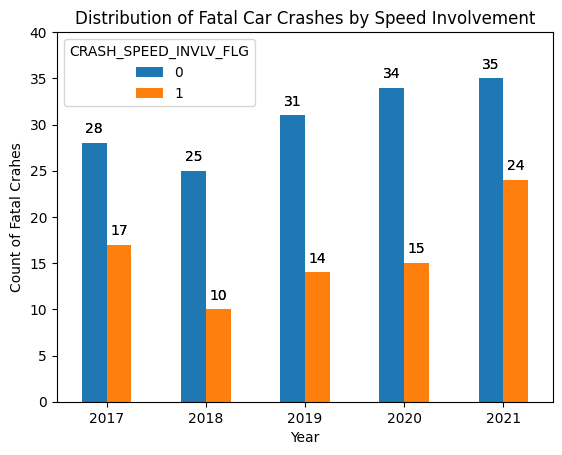

In [30]:
# Crash Causes Visualized

fatal_causes = pd.crosstab(fatal_crashes['CRASH_YR_NO'], fatal_crashes['CRASH_SPEED_INVLV_FLG'])

fatal_causes_plot = fatal_causes.plot(kind = "bar", rot = 0)
fatal_causes_plot.set_ylim(0, 40)

# Adding data labels
for p in fatal_causes_plot.patches:
    
    fatal_causes_plot.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                               ha='center', va='center', xytext=(0, 10), textcoords='offset points')
    fatal_causes_plot.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                               ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.xlabel("Year")
plt.ylabel("Count of Fatal Crahes")
plt.title("Distribution of Fatal Car Crashes by Speed Involvement")
plt.show()

In [31]:
fatal_causes['Involvement Ratio'] = fatal_causes[1] /  fatal_causes.sum(axis=1)
fatal_causes

CRASH_SPEED_INVLV_FLG,0,1,Involvement Ratio
CRASH_YR_NO,,,
2017,28,17,0.377778
2018,25,10,0.285714
2019,31,14,0.311111
2020,34,15,0.306122
2021,35,24,0.406780


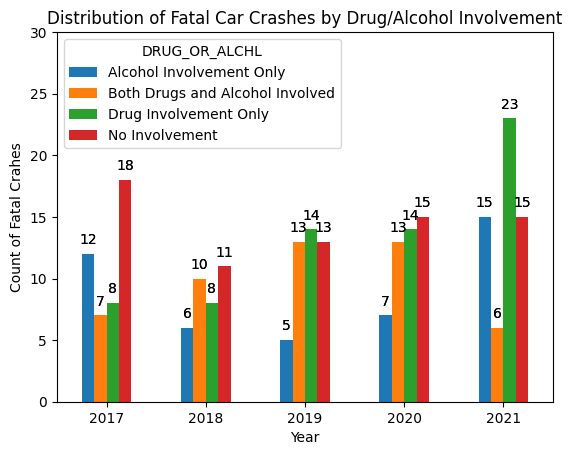

In [32]:
# Drug or Alcohol Involvement Visualized

fatal_crashes['DRUG_OR_ALCHL'] = fatal_crashes.apply(lambda row: 'No Involvement' if row['ALCHL_INVLV_FLG'] == 0 and row['DRUG_INVLV_FLG'] == 0 else
                                                                 'Drug Involvement Only' if row['ALCHL_INVLV_FLG'] == 0 and row['DRUG_INVLV_FLG'] == 1 else
                                                                 'Alcohol Involvement Only' if row['ALCHL_INVLV_FLG'] == 1 and row['DRUG_INVLV_FLG'] == 0 else
                                                                 'Both Drugs and Alcohol Involved', axis=1)

fatal_da = pd.crosstab(fatal_crashes['CRASH_YR_NO'], fatal_crashes['DRUG_OR_ALCHL'])

fatal_da_plot = fatal_da.plot(kind = "bar", rot = 0)
fatal_da_plot.set_ylim(0, 30)

# Adding data labels
for p in fatal_da_plot.patches:
    
    fatal_da_plot.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                               ha='center', va='center', xytext=(0, 10), textcoords='offset points')
    fatal_da_plot.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                               ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.xlabel("Year")
plt.ylabel("Count of Fatal Crahes")
plt.title("Distribution of Fatal Car Crashes by Drug/Alcohol Involvement")
plt.show()

In [33]:
fatal_da['Involvement Ratio'] = 1 - (fatal_da['No Involvement'] /  fatal_da.sum(axis=1))
fatal_da

DRUG_OR_ALCHL,Alcohol Involvement Only,Both Drugs and Alcohol Involved,Drug Involvement Only,No Involvement,Involvement Ratio
CRASH_YR_NO,,,,,
2017,12,7,8,18,0.600000
2018,6,10,8,11,0.685714
2019,5,13,14,13,0.711111
2020,7,13,14,15,0.693878
2021,15,6,23,15,0.745763


# Clustering ML Model

In [35]:
# We opted to use K-Means for the simple implementation with our spatial data

# Importing the required package
from sklearn.cluster import KMeans

# Running the K-Means clustering algorithm on the latitude and longitude of every crash
locations = crashes_portland[['LAT_DD', 'LONGTD_DD']]
kmeans = KMeans(n_clusters = 200, random_state = 42)
y_pred = kmeans.fit_predict(locations)
locations['cluster'] = y_pred

In [37]:
# Finding the top 5 clusters with the most crashes

counts = {}

for i in range(200):

    check = locations['cluster'].value_counts()[i]
    counts[check] = i

top5 = []
test = [x for x in counts.keys()]

for i in range(5):

    big = np.max(test)
    test.remove(big)
    top5.append(big)

top5 = [counts[x] for x in top5]
print(top5)

[70, 49, 8, 41, 20]


In [38]:
# Mapping every cluster
# This doesn't reveal much, but it visualizes what the model generated

fig = px.scatter_mapbox(locations,
                        lat="LAT_DD",
                        lon="LONGTD_DD",
                        color='cluster',
                        zoom=10)

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

In [39]:
# Mapping the top 5 clusters
# This should tell us where there are "hotspots" for crashes in Portland

largest_cluster = locations[locations['cluster'].isin(top5)]

fig = px.scatter_mapbox(largest_cluster,
                        lat="LAT_DD",
                        lon="LONGTD_DD",
                        color='cluster',
                        zoom=10)

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

In [40]:
# To produce more actionable insight, filtering the data down to only 2017-2021 and regenerating the clusters

recent_locations = crashes_portland[crashes_portland['CRASH_YR_NO'].isin(range(2016,2021))][['LAT_DD', 'LONGTD_DD']]
kmeans = KMeans(n_clusters=200, random_state=42)
y_pred = kmeans.fit_predict(recent_locations)
recent_locations['cluster'] = y_pred

In [41]:
# Calculating the new top 5 clusters with the most crashes

counts = {}

for i in range(200):

    check = recent_locations['cluster'].value_counts()[i]
    counts[check] = i

top5 = []
test = [x for x in counts.keys()]

for i in range(5):

    big = np.max(test)
    test.remove(big)
    top5.append(big)
    
top5 = [counts[x] for x in top5]

In [42]:
# Mapping the top 5 clusters from only the recent data

largest_cluster = recent_locations[recent_locations['cluster'].isin(top5)]

fig = px.scatter_mapbox(largest_cluster,
                        lat="LAT_DD",
                        lon="LONGTD_DD",
                        color='cluster',
                        zoom=10)

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

# Clustering Based on Feature Selection Results

In [43]:
# Filtering the data to only recent crashes, and including the flag for whether excessive speed was a factor
# The feature selection model found this variable to be one of the most significant

yrs = crashes_portland[crashes_portland['CRASH_YR_NO'].isin(range(2017, 2022))]
speed = yrs[['LAT_DD', 'LONGTD_DD', 'CRASH_SPEED_INVLV_FLG', 'POST_SPEED_LMT_VAL']]

# Generating new clusters for this data
kmeans = KMeans(n_clusters = 150, random_state = 42)
y_pred = kmeans.fit_predict(speed[['LAT_DD', 'LONGTD_DD']])
speed['cluster'] = y_pred

In [44]:
# Identifying the clusters with the highest ratios of speeding-involved crashes

cluster_counts_speed = speed.groupby(['cluster', 'CRASH_SPEED_INVLV_FLG']).size().unstack().fillna(0)
cluster_proportions_speed = cluster_counts_speed.div(cluster_counts_speed.sum(axis=1), axis=0)

high_concentration_clusters_speed = cluster_proportions_speed[1.0] > 0.12  # Define a threshold
high_concentration_cluster_ids_speed = high_concentration_clusters_speed[high_concentration_clusters_speed].index

In [55]:
# Displaying which clusters were past a certain threshold of speed involvement in the crash

print(high_concentration_cluster_ids_speed)

Index([11, 13, 46, 64, 87, 99, 117, 125], dtype='int32', name='cluster')


In [53]:
# Mapping the clusters with the highest ratios of speeding-involved crashes

speed_cluster = speed[speed['cluster'].isin(high_concentration_cluster_ids_speed)]

fig = px.scatter_mapbox(speed_cluster,
                        lat="LAT_DD",
                        lon="LONGTD_DD",
                        color='cluster',
                        zoom=10)

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

In [45]:
# Filtering the data to only recent crashes, and including the flags for whether drugs or alcohol were involved
# The feature selection model identified these to be some of the most significant factors, and it makes sense to analyze them together

yrs = crashes_portland[crashes_portland['CRASH_YR_NO'].isin(range(2017, 2022))]
drug = yrs[['LAT_DD', 'LONGTD_DD', 'DRUG_INVLV_FLG', 'ALCHL_INVLV_FLG']]

# Generating new clusters for this data
kmeans = KMeans(n_clusters = 150, random_state = 42)
y_pred = kmeans.fit_predict(drug[['LAT_DD', 'LONGTD_DD']])
drug['cluster'] = y_pred

In [46]:
# Identifying the clusters with the highest ratios of drug or alcohol-involved crashes

cluster_counts_drug = drug.groupby(['cluster', 'DRUG_INVLV_FLG']).size().unstack().fillna(0)
cluster_proportions_drug = cluster_counts_drug.div(cluster_counts_drug.sum(axis=1), axis=0)

cluster_counts_alchl = drug.groupby(['cluster', 'ALCHL_INVLV_FLG']).size().unstack().fillna(0)
cluster_proportions_alchl = cluster_counts_alchl.div(cluster_counts_alchl.sum(axis=1), axis=0)

high_concentration_clusters_drug = cluster_proportions_drug[1.0] > 0.025  # Define a threshold
high_concentration_cluster_ids_drug = high_concentration_clusters_drug[high_concentration_clusters_drug].index
high_concentration_clusters_alchl = cluster_proportions_alchl[1.0] > 0.09  # Define a threshold
high_concentration_cluster_ids_alchl = high_concentration_clusters_alchl[high_concentration_clusters_alchl].index

In [52]:
# Displaying which clusters had the least and most drug/alcohol related crashes

print(cluster_proportions_drug.sort_values(by = 1.0))
print(cluster_proportions_alchl.sort_values(by = 1.0))

# Displaying which clusters were past a certain threshold of percentage crashes involving drugs/alcohol

print(high_concentration_cluster_ids_drug)
print(high_concentration_cluster_ids_alchl)

DRUG_INVLV_FLG         0         1
cluster                           
117             1.000000  0.000000
24              1.000000  0.000000
69              1.000000  0.000000
124             1.000000  0.000000
125             1.000000  0.000000
...                  ...       ...
88              0.975207  0.024793
109             0.973451  0.026549
13              0.973154  0.026846
149             0.966443  0.033557
49              0.948529  0.051471

[150 rows x 2 columns]
ALCHL_INVLV_FLG         0         1
cluster                            
69               1.000000  0.000000
51               1.000000  0.000000
83               0.994382  0.005618
111              0.991781  0.008219
44               0.989583  0.010417
...                   ...       ...
81               0.912718  0.087282
45               0.908213  0.091787
11               0.908163  0.091837
41               0.906122  0.093878
46               0.904762  0.095238

[150 rows x 2 columns]
Index([13, 49, 109, 149], dty

In [51]:
# Tagging the clusters in our result which had high ratios of drug-related crashes, alcohol-related crashes, or both

highest = drug[drug['cluster'].isin(high_concentration_cluster_ids_alchl) | drug['cluster'].isin(high_concentration_cluster_ids_drug)]
highest = highest.reset_index()
typelist = []

for index, row in highest.iterrows():

    if row['cluster'] in high_concentration_cluster_ids_alchl:

        if row['cluster'] in high_concentration_cluster_ids_drug:
            typelist.append('Both')

        else:
            typelist.append('Alcohol')

    else:
        typelist.append('Drugs')
        
highest['type'] = typelist

,index,LAT_DD,LONGTD_DD,DRUG_INVLV_FLG,ALCHL_INVLV_FLG,cluster,type
0,17331,45.519067,-122.530025,0,0,109,Drugs
1,17351,45.519067,-122.530025,0,0,109,Drugs
2,17357,45.519067,-122.530025,0,0,109,Drugs
3,17371,45.519081,-122.527433,0,0,109,Drugs
4,17377,45.519067,-122.530025,0,0,109,Drugs
...,...,...,...,...,...,...,...
1247,338694,45.515814,-122.722981,0,0,11,Alcohol
1248,338749,45.537826,-122.510302,0,0,13,Drugs
1249,338908,45.572455,-122.630428,0,1,41,Alcohol
1250,338929,45.555477,-122.653697,0,0,45,Alcohol


In [50]:
# Mapping the clusters with the highest ratio of drug or alcohol-related crashes

fig = px.scatter_mapbox(highest,
                        lat="LAT_DD",
                        lon="LONGTD_DD",
                        color='type',
                        zoom=10)

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

# Results of the final maps

* There is some noticeable overlap between the speed clusters and the drug/alcohol clusters

* Specifically, the clusters along Marine Drive in Northwest Portland

* These not only had significant overlap, but had some of the highest ratios for all 3 variables

# Our Conclusion

* Based on our findings, we determined that the identified section of Marine Drive requires attention

* Due to the problems with speeding and drugs/alcohol, we propose that the city increase traffic patrols in the area

* Their presence would lead to increased DUI prosecutions and reduced speeds, resulting in a mitigation of the most significant factors to crashes in the area